In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as ss

### Questão 01

In [2]:
data = [1,3,5,4,0,5,1,3,5]

In [3]:
df = pd.DataFrame(data)

In [4]:
df.describe()

,0
count,9.000000
mean,3.000000
std,1.936492
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


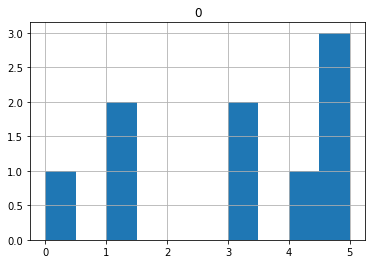

In [5]:
df.hist();

### Questão 02

In [6]:
rand = np.random.normal(loc=60, scale=10, size=5000)

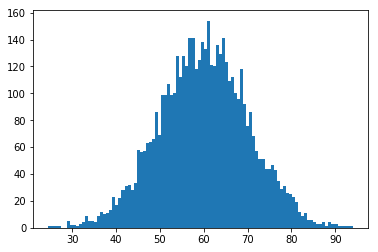

In [9]:
plt.hist(rand,bins=100);

### Questão 03

In [16]:
#Distribuição gamma
gamma_ = ss.gamma.rvs(5,loc=100,scale=22,size=5000)

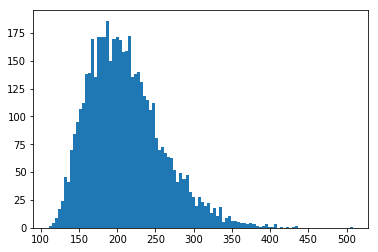

In [17]:
plt.hist(gamma_,bins=100);

In [29]:
#Distribuição de bernoulli
bernoulli_ = ss.bernoulli.rvs(0.9,loc=10,size=5000)

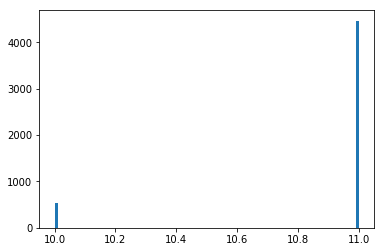

In [31]:
plt.hist(bernoulli_,bins=100);

### Questão 04